load the datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # importing the package pandas

In [ ]:
train_df  = pd.read_csv('/content/drive/MyDrive/Kannada MNIST/train.csv') # train dataset
test_df = pd.read_csv('/content/drive/MyDrive/Kannada MNIST/test.csv') # test dataset

In [ ]:
train_df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head(2)

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.rename(columns = {'id':'label'}, inplace = True)

In [ ]:
test_df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# appending both train and test into a single dataframe

df = train_df.append(test_df)


<ipython-input-9-ff391b094aa8>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_df.append(test_df)


In [ ]:
df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, decomposition


In [ ]:
X = df.loc[ : , df.columns != 'label']
y = df.loc[ : , df.columns == 'label']

In [ ]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,label
0,0
1,1
2,2
3,3
4,4
...,...
4995,4995
4996,4996
4997,4997
4998,4998


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00392235,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00392235,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00392235,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00392235,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00392235,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00392235,  0.        ]])

In [ ]:
X_scaled.shape

(65000, 784)

# Scree plot code

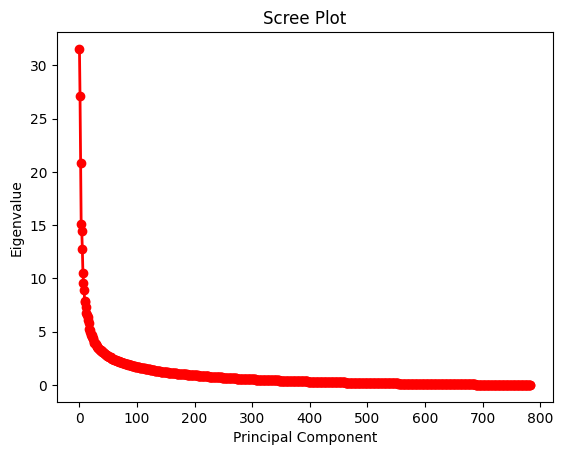

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Create a PCA model
pca = PCA(n_components=None)

# Fit the PCA model to the data
pca.fit(X_scaled)

# Calculate the eigenvalues
eigenvalues = pca.explained_variance_

# Create a scree plot
plt.plot(eigenvalues, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()


In [ ]:
pca_train=PCA(n_components=4,whiten=True)
pca_train.fit(df.drop('label',axis=1))

PCA(n_components=4, whiten=True)

In [ ]:
X_post_pca=pca_train.transform(df.drop('label',axis=1))
X_post_transform=pd.DataFrame(X_post_pca)
X_post_transform

,0,1,2,3
0,1.394619,-0.722091,0.059556,-1.052833
1,0.690761,-0.266636,0.146220,-1.843916
2,-0.976917,1.774358,1.314334,-0.513476
3,-0.799454,0.249539,-1.245910,-0.045474
4,-0.230649,-0.014168,-1.572159,0.427898
...,...,...,...,...
64995,0.388643,-1.173890,-0.022610,-1.532717
64996,1.254720,-0.664606,0.619281,-1.951873
64997,-0.072900,0.112486,-1.043395,-1.235113
64998,-0.879759,-0.505279,1.362714,-0.012588


In [ ]:
import numpy as np

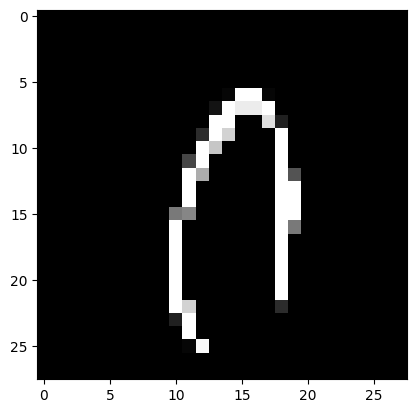

In [ ]:
plt.imshow(df.drop('label',axis=1)[1:2].to_numpy().reshape(28,28),cmap="gray")

In [ ]:
original_transform=pca_train.inverse_transform(X_post_transform)
pd_new=pd.DataFrame(original_transform)
pd_new

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,3.279829e-14,-9.036132e-16,-2.721582e-15,-1.219739e-14,4.149505e-15,0.003279,0.011869,-0.001790,0.005140,0.021482,...,0.058444,0.045217,0.037752,0.045351,0.025508,0.001122,0.008554,0.0,-0.000226,0.0
1,2.779629e-14,-1.713350e-15,-4.775231e-15,-2.105797e-14,7.198032e-15,0.015396,0.050968,0.029571,0.088137,0.144764,...,0.059329,0.038582,0.029213,0.031360,0.024634,-0.000028,0.011249,0.0,0.002597,0.0
2,-3.170822e-14,8.470057e-15,-1.436243e-15,-6.022024e-15,2.630549e-15,0.035508,0.119501,0.148793,0.330078,0.505111,...,0.030531,0.032807,0.032094,0.041838,0.018722,0.001695,0.005539,0.0,0.005014,0.0
3,-2.218263e-14,-9.671085e-15,-1.858052e-17,3.089788e-16,-6.349295e-16,0.007134,0.013258,0.007536,0.030691,0.021685,...,0.011898,-0.004478,-0.008059,-0.012981,-0.003514,-0.000395,0.009595,0.0,0.006776,0.0
4,-2.264058e-14,-1.126787e-14,1.233149e-15,5.775877e-15,-2.632917e-15,-0.002359,-0.020504,-0.024697,-0.044764,-0.096531,...,0.011300,-0.002147,-0.004652,-0.006990,-0.003826,0.000181,0.008277,0.0,0.005267,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,4.909172e-14,-2.180900e-15,-3.958832e-15,-1.772200e-14,5.983223e-15,0.008022,0.032546,0.006562,0.025885,0.058474,...,0.051942,0.029214,0.018776,0.017511,0.018009,-0.000408,0.011696,0.0,0.002082,0.0
64996,4.643706e-14,1.881317e-15,-5.091126e-15,-2.269190e-14,7.948962e-15,0.013242,0.049152,0.028463,0.078961,0.144992,...,0.070609,0.052663,0.042557,0.048935,0.032214,0.000583,0.010408,0.0,0.000199,0.0
64997,-3.819079e-15,-9.953554e-15,-3.107252e-15,-1.333162e-14,4.073960e-15,0.011222,0.026535,0.003671,0.038497,0.041176,...,0.035358,0.010709,0.003265,-0.001803,0.008181,-0.000906,0.012076,0.0,0.006083,0.0
64998,3.065516e-14,1.047776e-14,-1.468571e-16,-1.108100e-15,9.554909e-16,0.017059,0.074997,0.094076,0.180678,0.308134,...,0.028292,0.028819,0.025052,0.032256,0.013421,0.001548,0.005677,0.0,0.001381,0.0


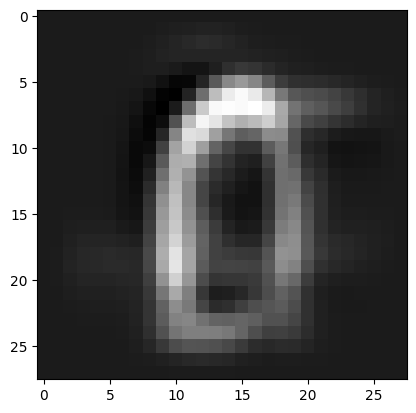

In [ ]:
plt.imshow(pd_new[1:2].to_numpy().reshape(28,28),cmap="gray")